In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 線性迴歸

### 1-1 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 50 個點

In [2]:
x = np.linspace(0, 5, 50)

In [3]:
y = 1.2*x + 0.8

畫出圖形來。

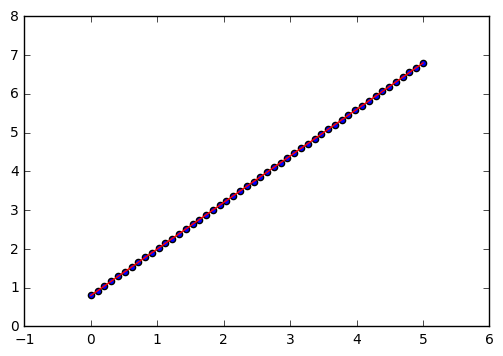

In [4]:
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, 'r')

### 1.2 加入 noise 項, 看來更真實

大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [5]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)

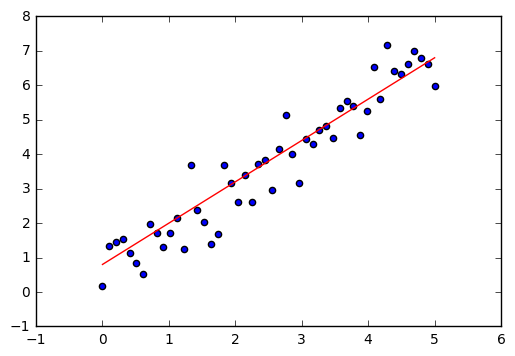

In [6]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

### 1.3 做線性迴歸找出那條線

做線性迴歸有很多套件, 但我們這裡用 `scipy.optimize` 裡的 `curve_fit`。這個套件比一般線性迴歸可能複雜一點, 但適用性更廣, 因為基本上可假設成「任意」的函數。

In [7]:
from scipy.optimize import curve_fit

In [8]:
def f(x, a, b):
    return a*x + b

In [9]:
popt, pcov = curve_fit(f, x, y)

#### `popt`
讓平方誤差最小的最佳化 (optimal) 參數 (parameter)。 

#### `pcov`
`popt` 的估計 `covariance`。如果我們求 `pcov` 的 eigenvalues, 就是各參數的變異數估計。如果再開根號, 就是標準差。

In [10]:
popt

array([ 1.2759338,  0.5034185])

In [11]:
a, b = popt

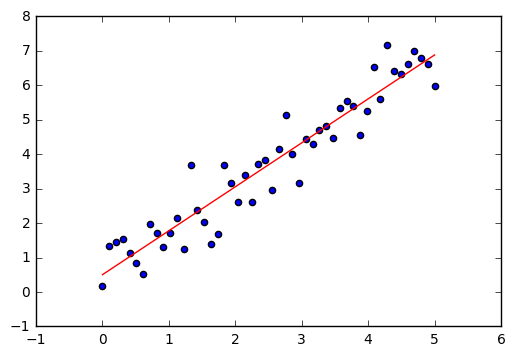

In [12]:
plt.scatter(x, y)
plt.plot(x, a*x + b, 'r')

算算兩個變數 a, b 的估計標準差。

In [13]:
a_std, b_std = np.sqrt(np.diag(pcov))

In [14]:
a_std, b_std

(0.058800718772200812, 0.17060689007605379)

### 1.4 迴歸的限制

我們可以看到, 迴歸法基本上你要有「感覺」這是什麼樣的函數。雖然等一下我們就會看到其實不只線性函數, 很多都可以做。而且「線性迴歸」其實不只可以處理線性的問題, 不過這不是我們這裡要討論的。

另一方面, 等等會發現在迴歸、機器學習很多學函數的方法, 都會有要找「合適參數」的問題, 等等我們就會碰到這樣的問題。

當然事實上還有一些方法有點「大補帖」式的, 也就是我們也不用太知道明確長得像什麼函數, 但幾乎都可以學的。不過因為我們要專注在深度學習, 這些方法會暫時不談。

## 2. 標準函數訓練及測試

### 2.1 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.cross_validation
    
裡的

    train_test_split
    
來亂數選一定百分比的資料來用。

In [15]:
from sklearn.cross_validation import train_test_split

把原來的 `x`, `y` 中的 80% 給 training data, 20% 給 testing data。

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

我們在「訓練」這個函數時只有以下這些資料。

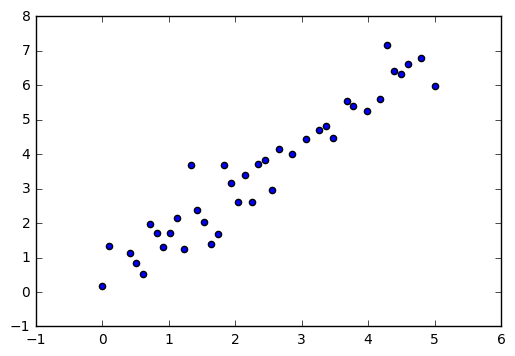

In [17]:
plt.scatter(x_train, y_train)

### 2.2 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [18]:
popt, pcov = curve_fit(f, x_train, y_train)

In [19]:
a, b = popt

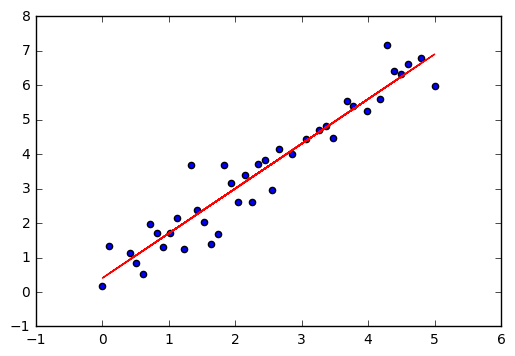

In [20]:
plt.scatter(x_train, y_train)
plt.plot(x_train, a*x_train + b, 'r')

### 2.3 用測試資料試試我們預測準不準

In [21]:
mse = np.sum((a*x_test + b - y_test)**2) / len(x_test)

In [22]:
mse

0.5538452831248698

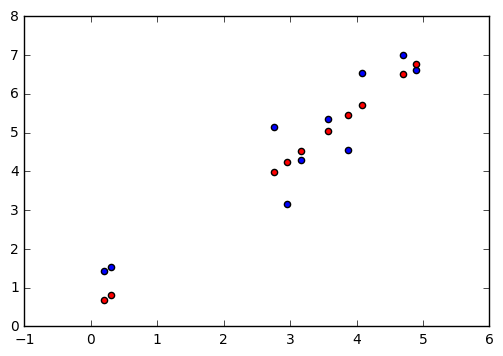

In [23]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, a*x_test + b, c='r')

自然我們也可以預測完全沒有出現過的。

In [24]:
a*6 + b

8.203036532489385

## 3. 不是線性的目標函數

這裡我們用個非線性的函數來生假數據:

$$f(x) = \sin(3.2x) + 0.8x$$

一樣準備加上一些 noise。

### 3.1 生成假資料

In [25]:
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(50)

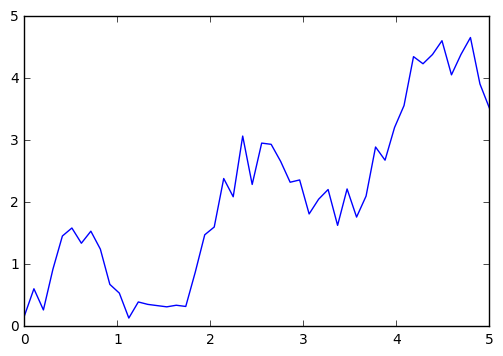

In [26]:
plt.plot(x, y)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### 3.2 準備生這個函數

In [28]:
def f(x, a, b):
    return np.sin(a*x) + b*x

In [29]:
x_sorted = np.sort(x_train)

In [30]:
popt, pcov = curve_fit(f, x_train, y_train)

In [31]:
a, b = popt

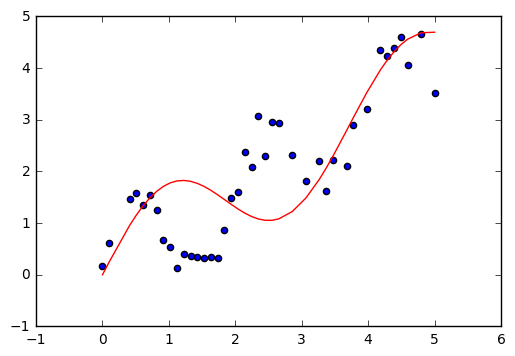

In [32]:
plt.scatter(x_train, y_train)
plt.plot(x_sorted,np.sin(a*x_sorted) + b*x_sorted,'r')

這次學得不太像, 我們來看到底學到什麼?

In [33]:
print(a, b)

1.69382775461 0.775644597662


### 3.3 偷偷告訴 Python 比較接近的答案

我們可以用

    p0 = [a,b]
    
這種格式來要 Python 以這參數做起始值。

In [34]:
popt, pcov = curve_fit(f, x_train, y_train, p0=[3,1])

In [35]:
a, b = popt

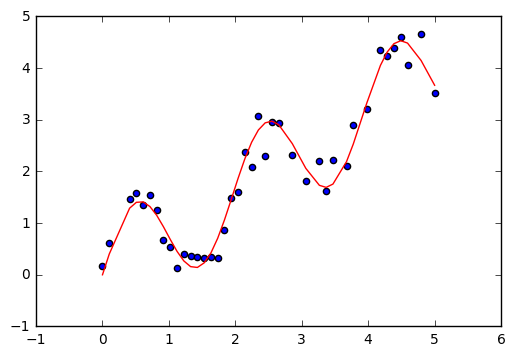

In [36]:
plt.scatter(x_train, y_train)
plt.plot(x_sorted,np.sin(a*x_sorted) + b*x_sorted,'r')

是不是像多了!